# Time Series Forecasting

Analysis Gantry CPU using time Series with ARIMA

In [32]:
%matplotlib inline

In [33]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [34]:
col_list = ['date', 'cpu']    # 컬럼 선택
df = pd.read_csv('../csv_data/m_data.csv', usecols=col_list, index_col=0)
df.head()

,cpu
date,
2020-06-29,0.092267
2020-06-29,0.093267
2020-06-29,0.093200
2020-06-29,0.092067
2020-06-29,0.096600


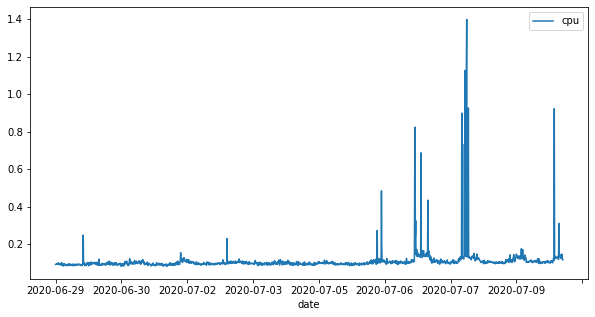

In [35]:
plt.rcParams['figure.figsize'] = [10, 5]
df.plot()

모수 설정 : 
ARIMA의 모수는 크게 3가지가 있다. AR모형의 Lag을 의미하는 p, MA모형의 Lag을 의미하는 q, 차분(Diffrence)횟수를 의미하는 d 가 그것이다. 보통은 p, d, q의 순서로 쓴다.
통상적으로 p + q < 2, p * q = 0 인 값들을 많이 사용한다.

In [36]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

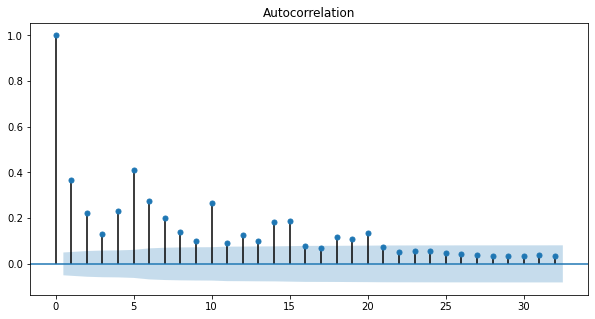

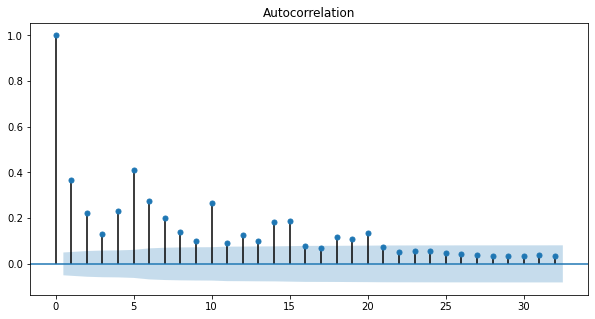

In [37]:
plot_acf(df)

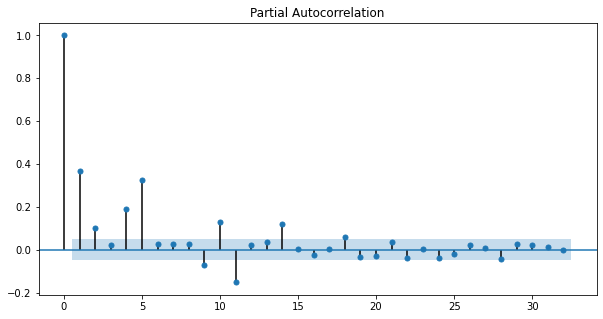

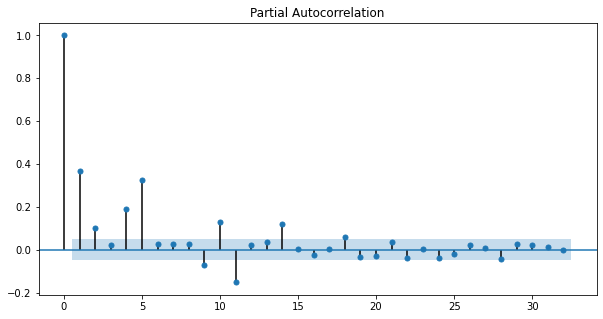

In [38]:
plot_pacf(df)

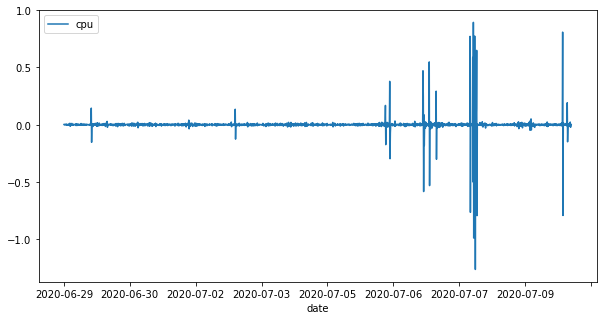

In [39]:
diff_df = df.diff(periods=1).iloc[1:]
diff_df.plot()

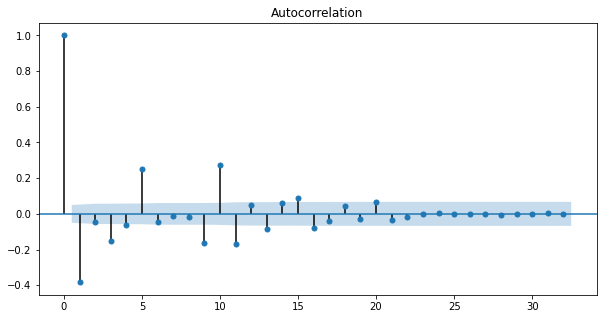

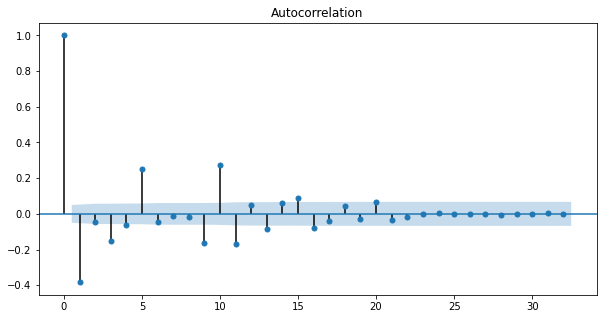

In [40]:
plot_acf(diff_df)

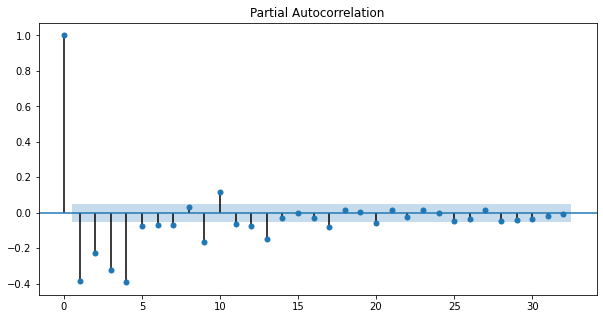

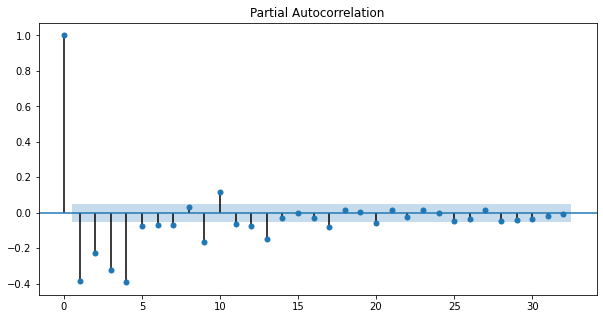

In [41]:
plot_pacf(diff_df)

In [52]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(df, order=(0,1,1))
model_fit = model.fit(trend='nc', full_output=True, disp=1)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                  D.cpu   No. Observations:                 1541
Model:                 ARIMA(0, 1, 1)   Log Likelihood                1993.849
Method:                       css-mle   S.D. of innovations              0.066
Date:                Fri, 10 Jul 2020   AIC                          -3983.699
Time:                        06:45:32   BIC                          -3973.018
Sample:                             1   HQIC                         -3979.725
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
ma.L1.D.cpu    -0.8412      0.016    -51.871      0.000      -0.873      -0.809
                                    Roots                                    
                  Real          Imaginary         

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


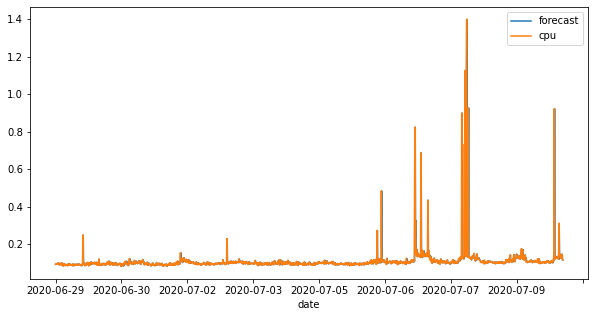

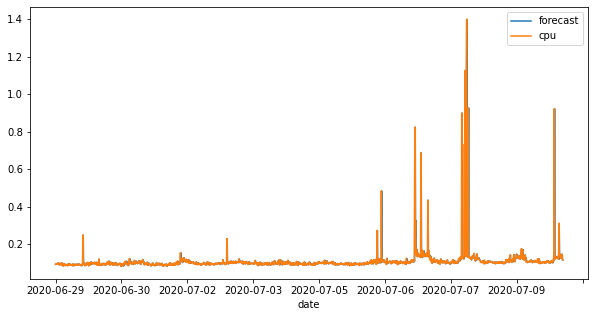

In [50]:
model_fit.plot_predict()

In [44]:
fore = model_fit.forecast(steps = 1)
print(fore)

(array([0.13316276]), array([0.06632392]), array([[0.00317026, 0.26315525]]))
